# Curse of dimensionality in hyperbolic spaces
<div style="text-align: justify">
If we take a vector v = ($x_0$, $x_1$, ..., $x_n$) in an (n + 1)-dimensional coordinate space R $^{n+1}$, an n-dimensional hyperbolic space is defined by the following equation:

$$ -x_0^2 + x_1^2 + ... + x_n^2 = -1 $$

This space contains two surfaces, the S $^+$ and S $^-$ surface when $x_0 > 0$ and $x_0 < 0$ respectively.
In this notebook we explore the behavior of average distances between points in the S $^+$ component of the hyperbolic space.
Particulary, we want to see what happens with the distances when the dimensionality of the space, n, increases.
The idea is to see whether or not the distances in this space are sentive to curse of dimensionality when n increases.

Since an hyperbolic space is a geometric object known as a manifold, the distance between points are measure with geodesics, which is the equivalent to a stright line in an Euclidean space.
A geodesic is the shortest distance between two points in a manifold, as is the case of a stright line in an Euclidean space. From differential geometry, the distance between two points __x__ and __y__ in an hyperbolic space is given by:

$$ \text{d}(\textbf{x}, \textbf{y}) = arcosh( -\text{B}(\textbf{x}, \textbf{y}) ),$$
where,
$$\text{B}(\textbf{x}, \textbf{y}) = \frac{1}{2} \times \left( \textbf{Q}(\textbf{x} + \textbf{y}) - \textbf{Q}(\textbf{x}) - \textbf{Q}(\textbf{y})\right),$$
and,
$$\textbf{Q}(\textbf{x}) = -x_0^2 + x_1^2 + ... + x_n^2.$$
</div>

Before delving deeper into distances in this space, let us inspect the aspect of a 1-hyperbolic and 2-hyperbolic space.
These two spaces are easy to visualize since they are embedded in a 2 and 3 dimensional Euclidean space.

In [2]:
import os

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

from topocurse.sampling import random_points_hyperbolic
from topocurse.metrics import hyperbolic_distance
from topocurse.figures import contrast_plot

In [3]:
# directories
user = "/home/edgar/"
work_directory = f"{user}/topological-curse-of-dimensionality"
save_plots_to = f"{work_directory}/images"

if os.path.exists(save_plots_to) is False:
    os.makedirs(save_plots_to)

## 1 and 2 dimensional hyperbolic spaces

In [4]:
# number of random points to generate in the hyperbolic space
N = 1_000

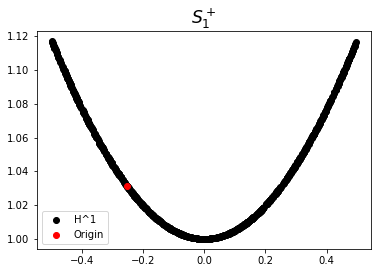

In [9]:
S_1 = random_points_hyperbolic(n=1, N=N)
origin = S_1[np.random.randint(0, N)].reshape(1, -1)

# plot 1-hyperbolic space
fig, ax = plt.subplots(figsize=None)

ax.set_title("$S_1^+$", fontsize="xx-large")
ax.scatter(S_1[:, 1], S_1[:, 0], color="black", label="H^1")
ax.scatter(origin[:, 1], origin[:, 0], color="red", label="Origin")
ax.legend()
# fig.savefig(f"{save_plots_to}/1_hyperbolic_space.png")

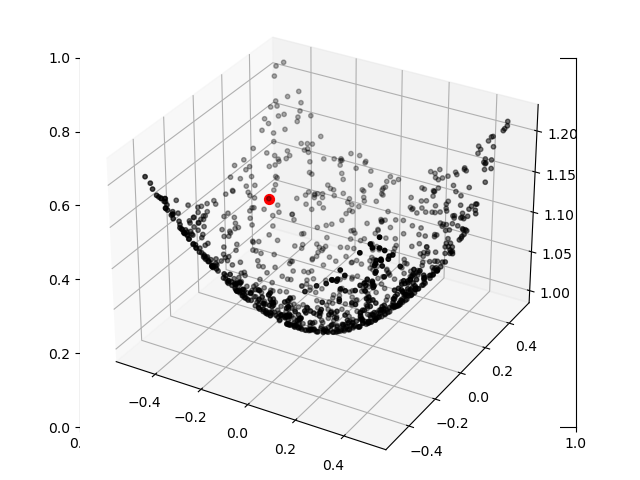

In [15]:
S_2 = random_points_hyperbolic(n=2, N=N)
origin = S_2[np.random.randint(0, N)].reshape(1, -1)

%matplotlib widget
fig, tmp = plt.subplots(
    figsize=None,
)
ax = Axes3D(fig=fig, auto_add_to_figure=False)
fig.add_axes(ax)

ax.set_title("$S_2^+$", fontsize="xx-large")
ax.scatter(
    S_2[:, 2], S_2[:, 1], S_2[:, 0],
    color="black", label="$S_2^+$", s=10
)
ax.scatter(
    origin[:, 2], origin[:, 1], origin[:, 0],
    color="red", label="Origin",
    s=50
)

In [13]:
%matplotlib inline
# number of dimensions
n_dimensions = 1_000  
nn = np.arange(1, n_dimensions + 1)
# contrast array
D_mm = np.empty(nn.size)

origin_at_minima = False

for n in nn:

    Hn = random_points_hyperbolic(n=n, N=N)

    # Query point
    if origin_at_minima is False:

        Y = random_points_hyperbolic(n=n, N=1)

    else:

        Y = None

    d = hyperbolic_distance(
        X=Hn,
        Y=Y,
        origin_at_minima=origin_at_minima,
    )

    D_mm[n - 1] = np.max(d) - np.min(d)

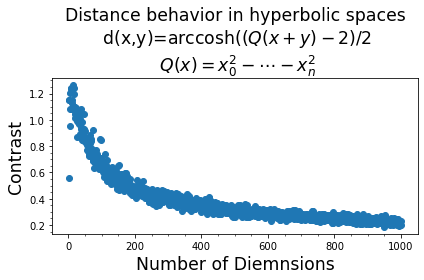

In [14]:
# plot distance behavior in hyperbolic spaces
fig, ax = contrast_plot(
    metric=
    "d(x,y)=arccosh($(Q(x+y)-2)/2$ \n $Q(x) = x_0^2 - \cdots -x_n^2$",
    title="Distance behavior in hyperbolic spaces",
)

ax.scatter(nn, D_mm)
# fig.savefig(f"{path_plot}/contrast_hyperbolic_space.png")
# fig.savefig(f"{path_plot}/contrast_hyperbolic_space.pdf")
# plt.close()